# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [9]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 9.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for your interests.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [4]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-2]#np.logspace(-9, 9, 19)#[1e-9, 1e-8, 1e-7]
regularization_strengths = [1e-7]#np.logspace(-8, 8, 17)#[5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr in learning_rates:
    for reg in regularization_strengths:
        curr_model = LinearSVM()
        curr_model.train(X_train_feats, y_train, lr, reg, num_iters=1500, verbose=True)
        
        y_train_pred = curr_model.predict(X_train_feats)
        train_acc = np.mean(y_train == y_train_pred)
        y_val_pred = curr_model.predict(X_val_feats)
        val_acc = np.mean(y_val == y_val_pred)
        results[(lr, reg)] = (train_acc, val_acc)
        
        if val_acc > best_val:
            best_val = val_acc
            best_svm = curr_model
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
# lr 1.000000e-02 reg 1.000000e-07 train accuracy: 0.509122 val accuracy: 0.511000

iteration 0 / 1500: loss 9.000023
iteration 100 / 1500: loss 3.118518
iteration 200 / 1500: loss 3.280965
iteration 300 / 1500: loss 3.000779
iteration 400 / 1500: loss 3.260835
iteration 500 / 1500: loss 3.150624
iteration 600 / 1500: loss 3.016033
iteration 700 / 1500: loss 3.194660
iteration 800 / 1500: loss 2.603864
iteration 900 / 1500: loss 3.708182
iteration 1000 / 1500: loss 3.017056
iteration 1100 / 1500: loss 2.787476
iteration 1200 / 1500: loss 2.486210
iteration 1300 / 1500: loss 2.807997
iteration 1400 / 1500: loss 2.910718
lr 1.000000e-02 reg 1.000000e-07 train accuracy: 0.511327 val accuracy: 0.513000
best validation accuracy achieved during cross-validation: 0.513000


In [5]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.481


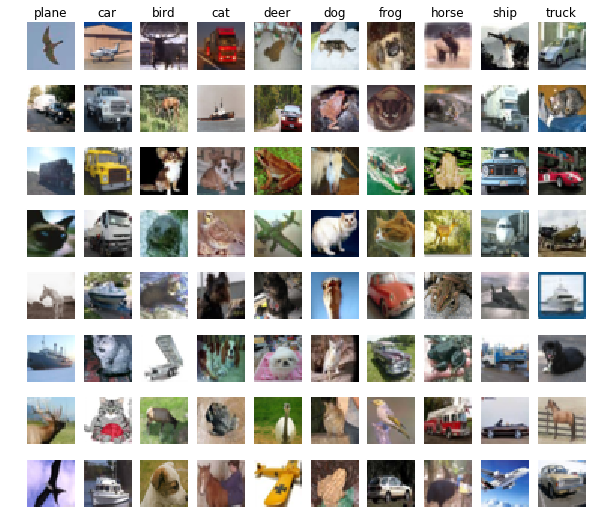

In [10]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [11]:
# Preprocessing: Remove the bias dimension
# Make sure to run this cell only ONCE
print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

(49000, 155)
(49000, 154)


In [12]:
from cs231n.classifiers.neural_net import TwoLayerNet
from itertools import product

input_dim = X_train_feats.shape[1]
#hidden_dim = 500
num_classes = 10

#net = TwoLayerNet(input_dim, hidden_dim, num_classes)
results = {}
best_val = -1
best_net = None

hidden_layer_sizes = [200]#np.arange(100, 600, 100)#np.arange(150, 300, 10)
learning_rates = np.logspace(-5, 0, 6)
num_iters = np.arange(100, 2000, 100)
reg_params = [1e-4]#np.logspace(-5, 5, 11)#np.linspace(0.1, 1, 10)
################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
for hls, lr, its, reg in product(hidden_layer_sizes, learning_rates, num_iters, reg_params):
    
    curr_net = TwoLayerNet(input_dim, hls, num_classes)
    curr_stats = curr_net.train(X_train_feats, y_train, X_val_feats, y_val,
                           num_iters=its, batch_size=200,
                           learning_rate=lr, learning_rate_decay=0.95,
                           reg=reg, verbose=True)

    val_acc = (curr_net.predict(X_val_feats) == y_val).mean()
    train_acc = (curr_net.predict(X_train_feats) == y_train).mean()
    results[(hls, lr, its, reg)] = (train_acc, val_acc)

    if val_acc > best_val:
        best_val = val_acc
        best_net = curr_net
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 100: loss 2.302585
iteration 0 / 200: loss 2.302585
iteration 100 / 200: loss 2.302585
iteration 0 / 300: loss 2.302585
iteration 100 / 300: loss 2.302585
iteration 200 / 300: loss 2.302585
iteration 0 / 400: loss 2.302585
iteration 100 / 400: loss 2.302586
iteration 200 / 400: loss 2.302585
iteration 300 / 400: loss 2.302585
iteration 0 / 500: loss 2.302585
iteration 100 / 500: loss 2.302585
iteration 200 / 500: loss 2.302585
iteration 300 / 500: loss 2.302586
iteration 400 / 500: loss 2.302585
iteration 0 / 600: loss 2.302585
iteration 100 / 600: loss 2.302585
iteration 200 / 600: loss 2.302585
iteration 300 / 600: loss 2.302585
iteration 400 / 600: loss 2.302585
iteration 500 / 600: loss 2.302585
iteration 0 / 700: loss 2.302585
iteration 100 / 700: loss 2.302585
iteration 200 / 700: loss 2.302585
iteration 300 / 700: loss 2.302585
iteration 400 / 700: loss 2.302585
iteration 500 / 700: loss 2.302585
iteration 600 / 700: loss 2.302585
iteration 0 / 800: loss 2.302585
i

iteration 500 / 900: loss 2.302588
iteration 600 / 900: loss 2.302588
iteration 700 / 900: loss 2.302579
iteration 800 / 900: loss 2.302585
iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 2.302583
iteration 200 / 1000: loss 2.302582
iteration 300 / 1000: loss 2.302584
iteration 400 / 1000: loss 2.302588
iteration 500 / 1000: loss 2.302590
iteration 600 / 1000: loss 2.302586
iteration 700 / 1000: loss 2.302589
iteration 800 / 1000: loss 2.302582
iteration 900 / 1000: loss 2.302581
iteration 0 / 1100: loss 2.302585
iteration 100 / 1100: loss 2.302585
iteration 200 / 1100: loss 2.302582
iteration 300 / 1100: loss 2.302582
iteration 400 / 1100: loss 2.302584
iteration 500 / 1100: loss 2.302584
iteration 600 / 1100: loss 2.302583
iteration 700 / 1100: loss 2.302586
iteration 800 / 1100: loss 2.302587
iteration 900 / 1100: loss 2.302584
iteration 1000 / 1100: loss 2.302591
iteration 0 / 1200: loss 2.302585
iteration 100 / 1200: loss 2.302586
iteration 200 / 1200: loss 2.302583
i

iteration 200 / 1300: loss 2.302555
iteration 300 / 1300: loss 2.302553
iteration 400 / 1300: loss 2.302559
iteration 500 / 1300: loss 2.302588
iteration 600 / 1300: loss 2.302544
iteration 700 / 1300: loss 2.302613
iteration 800 / 1300: loss 2.302556
iteration 900 / 1300: loss 2.302639
iteration 1000 / 1300: loss 2.302607
iteration 1100 / 1300: loss 2.302628
iteration 1200 / 1300: loss 2.302578
iteration 0 / 1400: loss 2.302585
iteration 100 / 1400: loss 2.302583
iteration 200 / 1400: loss 2.302584
iteration 300 / 1400: loss 2.302562
iteration 400 / 1400: loss 2.302561
iteration 500 / 1400: loss 2.302579
iteration 600 / 1400: loss 2.302585
iteration 700 / 1400: loss 2.302538
iteration 800 / 1400: loss 2.302622
iteration 900 / 1400: loss 2.302616
iteration 1000 / 1400: loss 2.302606
iteration 1100 / 1400: loss 2.302546
iteration 1200 / 1400: loss 2.302531
iteration 1300 / 1400: loss 2.302575
iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302599
iteration 200 / 1500: los

iteration 1400 / 1500: loss 2.301715
iteration 0 / 1600: loss 2.302585
iteration 100 / 1600: loss 2.302584
iteration 200 / 1600: loss 2.302462
iteration 300 / 1600: loss 2.302686
iteration 400 / 1600: loss 2.302553
iteration 500 / 1600: loss 2.302400
iteration 600 / 1600: loss 2.302907
iteration 700 / 1600: loss 2.302087
iteration 800 / 1600: loss 2.302613
iteration 900 / 1600: loss 2.302542
iteration 1000 / 1600: loss 2.302595
iteration 1100 / 1600: loss 2.302862
iteration 1200 / 1600: loss 2.302052
iteration 1300 / 1600: loss 2.301761
iteration 1400 / 1600: loss 2.301579
iteration 1500 / 1600: loss 2.301493
iteration 0 / 1700: loss 2.302585
iteration 100 / 1700: loss 2.302594
iteration 200 / 1700: loss 2.302723
iteration 300 / 1700: loss 2.302539
iteration 400 / 1700: loss 2.302609
iteration 500 / 1700: loss 2.302811
iteration 600 / 1700: loss 2.302583
iteration 700 / 1700: loss 2.303036
iteration 800 / 1700: loss 2.302348
iteration 900 / 1700: loss 2.302909
iteration 1000 / 1700: lo

iteration 500 / 1800: loss 1.437857
iteration 600 / 1800: loss 1.538116
iteration 700 / 1800: loss 1.422052
iteration 800 / 1800: loss 1.387708
iteration 900 / 1800: loss 1.312381
iteration 1000 / 1800: loss 1.359164
iteration 1100 / 1800: loss 1.275220
iteration 1200 / 1800: loss 1.355663
iteration 1300 / 1800: loss 1.467670
iteration 1400 / 1800: loss 1.313165
iteration 1500 / 1800: loss 1.268197
iteration 1600 / 1800: loss 1.366511
iteration 1700 / 1800: loss 1.250057
iteration 0 / 1900: loss 2.302585
iteration 100 / 1900: loss 2.301193
iteration 200 / 1900: loss 2.168232
iteration 300 / 1900: loss 1.934779
iteration 400 / 1900: loss 1.629777
iteration 500 / 1900: loss 1.521267
iteration 600 / 1900: loss 1.470713
iteration 700 / 1900: loss 1.421817
iteration 800 / 1900: loss 1.350438
iteration 900 / 1900: loss 1.350058
iteration 1000 / 1900: loss 1.354235
iteration 1100 / 1900: loss 1.353435
iteration 1200 / 1900: loss 1.303034
iteration 1300 / 1900: loss 1.445477
iteration 1400 / 1

In [13]:
# Run your best neural net classifier on the test set. You should be able
# to get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.546
